## Lending Club Case Study

In [1]:
# #import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read the dataset and check the first five rows
dataset_loan = pd.read_csv("D:/ML&AI/Lending Club Case Study/loan/loan.csv", low_memory=False)

dataset_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#Check the shape of the dataframe
dataset_loan.shape

(39717, 111)

### Data Handling and Cleaning

In [4]:
#Check the datatypes of all the columns of the dataframe
dataset_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


#### Missing Value Treatment

In [5]:
#Check the number of null values in the columns
dataset_loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

Handling missing values from the dataset
 - Taget the columns having missing values
 - drop from the records

In [6]:
#Drop the columns having all null values of the dataset
dataset_loan.dropna(how='all', axis=1, inplace=True)

#Check the shape of the dataframe
dataset_loan.shape

(39717, 57)

In [7]:
#Check the number of null values in the columns
dataset_loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [8]:
#Drop the columns having almost null values from loan dataset
dataset_loan.drop(columns=["title", "emp_title", "desc", "mths_since_last_delinq", "mths_since_last_record", "next_pymnt_d", "collections_12_mths_ex_med"], axis=1, inplace=True)

#Check the shape of the dataframe
dataset_loan.shape

(39717, 50)

In [9]:
#Check the most common value in the emp_length column
dataset_loan['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [10]:
#Fill up the nulls in the emp_length column with the above value
dataset_loan['emp_length'] = dataset_loan['emp_length'].fillna(dataset_loan['emp_length'].mode()[0])

In [11]:
#Check the nulls in the emp_length column again to cross-verify
dataset_loan['emp_length'].isnull().sum()

0

In [12]:
dataset_loan['emp_length'] = dataset_loan['emp_length'].replace('< 1','0', regex=True)

In [13]:
#clean the emp_length
dataset_loan['emp_length']=dataset_loan['emp_length'].apply(lambda x: x.split(" ")[0])

In [14]:
#Fill up the nulls in the pub_rec_bankruptcies column
dataset_loan['pub_rec_bankruptcies'] = dataset_loan['pub_rec_bankruptcies'].fillna(0)

In [15]:
#Drop the row having null values
dataset_loan = dataset_loan.dropna(subset=['tax_liens', 'chargeoff_within_12_mths', 'last_credit_pull_d', 'last_pymnt_d', 'revol_util'])

In [16]:
# Resetting the indices using df.reset_index()
dataset_loan = dataset_loan.reset_index(drop=True)

#Check the shape of the dataframe
dataset_loan.shape

(39542, 50)

In [17]:
#Drop the columns from dataset
dataset_loan.drop(columns=["id", "member_id", "addr_state", "zip_code", "url", "pymnt_plan", "delinq_amnt", "chargeoff_within_12_mths", "acc_now_delinq", "application_type", "policy_code", "open_acc", "inq_last_6mths", "initial_list_status", "out_prncp", "out_prncp_inv"], axis=1, inplace=True)

In [18]:
#clean the term and change into int
dataset_loan['term']=dataset_loan['term'].apply(lambda x: int(x.split(" ")[1]))

In [19]:
# remove '%' sign and change into float
def remove_perc(val):
 return float(val.replace("%",""))

In [20]:
#clean the int_rate
dataset_loan['int_rate']=dataset_loan['int_rate'].apply(remove_perc)

In [21]:
#clean the revol_util
dataset_loan['revol_util']=dataset_loan['revol_util'].apply(remove_perc)

In [22]:
dataset_loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+,RENT,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+,RENT,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+,RENT,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,0.0


In [23]:
#Perform the basic sanity checks with loan amount and funded_amnt
dataset_loan[(dataset_loan.funded_amnt > dataset_loan.loan_amnt)]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,tax_liens


#### Segmented univariate analysis

In [24]:
#Define defaulted dataset
default_dataset_loan = dataset_loan[dataset_loan.loan_status=="Charged Off"]

#Check the shape of the dataframe
default_dataset_loan.shape

(5537, 34)

In [25]:
#Check the datatypes of all the columns of the dataframe
default_dataset_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5537 entries, 1 to 39531
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                5537 non-null   int64  
 1   funded_amnt              5537 non-null   int64  
 2   funded_amnt_inv          5537 non-null   float64
 3   term                     5537 non-null   int64  
 4   int_rate                 5537 non-null   float64
 5   installment              5537 non-null   float64
 6   grade                    5537 non-null   object 
 7   sub_grade                5537 non-null   object 
 8   emp_length               5537 non-null   object 
 9   home_ownership           5537 non-null   object 
 10  annual_inc               5537 non-null   float64
 11  verification_status      5537 non-null   object 
 12  issue_d                  5537 non-null   object 
 13  loan_status              5537 non-null   object 
 14  purpose                

In [26]:
#Define non-defaulted dataset
non_default_dataset_loan = dataset_loan[dataset_loan.loan_status=="Fully Paid"]

#Check the shape of the dataframe
non_default_dataset_loan.shape

(32865, 34)

In [27]:
#Check the datatypes of all the columns of the dataframe
non_default_dataset_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32865 entries, 0 to 39541
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                32865 non-null  int64  
 1   funded_amnt              32865 non-null  int64  
 2   funded_amnt_inv          32865 non-null  float64
 3   term                     32865 non-null  int64  
 4   int_rate                 32865 non-null  float64
 5   installment              32865 non-null  float64
 6   grade                    32865 non-null  object 
 7   sub_grade                32865 non-null  object 
 8   emp_length               32865 non-null  object 
 9   home_ownership           32865 non-null  object 
 10  annual_inc               32865 non-null  float64
 11  verification_status      32865 non-null  object 
 12  issue_d                  32865 non-null  object 
 13  loan_status              32865 non-null  object 
 14  purpose               

#### Outliers Analysis Using Boxplot

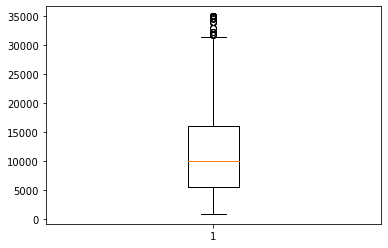

In [28]:
#Create a box plot for default data funded_amnt column
plt.boxplot(default_dataset_loan.funded_amnt)
plt.show()

In [29]:
default_dataset_loan.funded_amnt.describe()

count     5537.000000
mean     11815.689904
std       7751.444356
min        900.000000
25%       5600.000000
50%      10000.000000
75%      16000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [30]:
#Check the funded_amnt with more than 30000
default_dataset_loan[default_dataset_loan.funded_amnt > 30000]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,tax_liens
886,35000,35000,35000.00000,60,20.89,944.71,F,F1,5,RENT,...,20871.91,19689.10,94.480000,2529.18,455.2524,Sep-15,944.71,Dec-15,0.0,0.0
1084,34475,34475,34475.00000,60,14.27,807.01,C,C2,8,RENT,...,9008.49,8735.22,0.000000,3490.18,628.2324,Mar-14,200.52,Mar-14,0.0,0.0
1181,35000,35000,34975.00000,60,19.42,916.03,E,E3,3,MORTGAGE,...,17517.39,16360.38,0.000000,3216.34,578.9412,Jan-15,916.03,Jun-15,0.0,0.0
1581,35000,35000,34960.89318,60,15.96,850.39,C,C5,10+,MORTGAGE,...,8325.72,10176.34,0.000000,16560.06,2891.6319,Feb-14,1284.97,May-16,0.0,0.0
1594,35000,35000,34900.00000,60,12.42,786.01,B,B4,3,RENT,...,5382.07,4045.25,0.000000,0.00,0.0000,Dec-12,786.01,May-16,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18981,35000,35000,12793.19224,60,16.02,851.51,D,D5,10+,MORTGAGE,...,6355.35,6850.38,0.000000,11.30,0.0000,Sep-12,3000.00,May-16,0.0,0.0
19096,35000,35000,21068.32935,60,16.77,865.52,E,E2,3,MORTGAGE,...,13893.20,12071.83,0.000000,3016.14,30.1614,Oct-13,32.06,Feb-14,0.0,0.0
19192,35000,35000,34993.26306,60,16.40,858.59,E,E1,10+,OWN,...,4042.09,5172.50,0.000000,1082.76,11.1100,May-12,200.33,Sep-12,0.0,0.0
19384,35000,35000,34969.06266,60,21.22,951.21,G,G4,7,MORTGAGE,...,4669.81,8601.99,44.940951,1057.68,11.7000,Jun-12,952.25,Oct-12,0.0,0.0


In [31]:
#Clean the funded_amnt column for default
default_dataset_loan = default_dataset_loan[default_dataset_loan.funded_amnt < 30000]

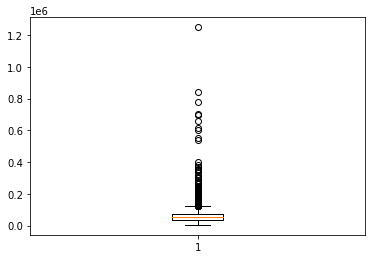

In [32]:
#Create a box plot for default data annual_inc column
plt.boxplot(default_dataset_loan.annual_inc)
plt.show()

In [33]:
default_dataset_loan.annual_inc.describe()

count    5.334000e+03
mean     6.095275e+04
std      4.664443e+04
min      4.080000e+03
25%      3.651960e+04
50%      5.200000e+04
75%      7.200000e+04
max      1.250000e+06
Name: annual_inc, dtype: float64

In [34]:
#Check the annual_inc with more than 110000
default_dataset_loan[default_dataset_loan.annual_inc > 110000]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,tax_liens
339,24000,24000,24000.000000,36,8.90,762.08,A,A5,10+,MORTGAGE,...,6036.95,1580.45,0.000000,1032.31,10.2500,Oct-12,762.08,Jun-15,0.0,0.0
559,28000,28000,28000.000000,36,7.90,876.13,A,A4,4,MORTGAGE,...,7125.17,1634.43,0.000000,1200.06,11.9400,Oct-12,876.13,Sep-14,0.0,0.0
595,22200,22200,22200.000000,36,19.42,818.49,E,E3,2,RENT,...,4940.21,3242.59,0.000000,991.81,9.8100,Oct-12,818.49,Mar-13,0.0,0.0
835,35000,22875,22875.000000,60,19.03,593.77,E,E2,4,MORTGAGE,...,6337.11,7318.78,0.000000,5420.08,921.4136,Dec-13,31.28,May-16,0.0,0.0
910,24000,24000,24000.000000,36,12.69,805.08,B,B5,1,RENT,...,23024.99,5136.52,80.492582,171.78,30.9204,Dec-14,805.08,Jul-15,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39327,9000,9000,400.005559,36,9.64,288.89,B,B4,4,MORTGAGE,...,6233.81,1276.01,0.000000,0.00,0.0000,Mar-10,288.89,May-16,0.0,0.0
39358,22350,22350,486.128661,36,14.07,764.64,E,E3,1,OWN,...,10005.99,3756.00,0.000000,556.88,5.6000,Jul-09,764.64,Jul-15,0.0,0.0
39435,25000,25000,499.999401,36,9.01,795.11,B,B2,10+,MORTGAGE,...,8260.95,2100.38,0.000000,0.00,0.0000,Dec-08,821.25,May-16,0.0,0.0
39459,10000,10000,1825.004738,36,9.01,318.05,B,B2,0,MORTGAGE,...,3239.25,893.70,47.689526,304.18,3.0900,Jul-09,500.11,Jan-11,0.0,0.0


In [35]:
#Clean the annual_inc column for default
default_dataset_loan = default_dataset_loan[default_dataset_loan.annual_inc < 110000]

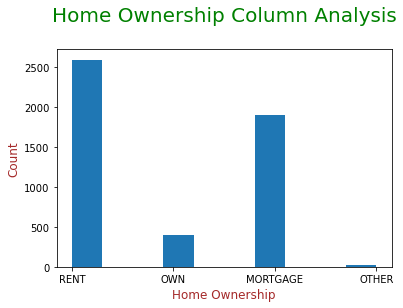

In [36]:
#Create a histogram of the home_ownership
plt.title("Home Ownership Column Analysis\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Home Ownership", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.hist(default_dataset_loan.home_ownership)
plt.show()

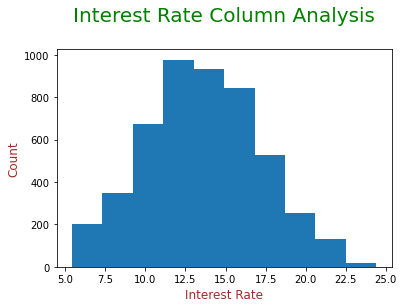

In [37]:
#Create a histogram of the int_rate
plt.title("Interest Rate Column Analysis\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Interest Rate", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.hist(default_dataset_loan.int_rate)
plt.show()

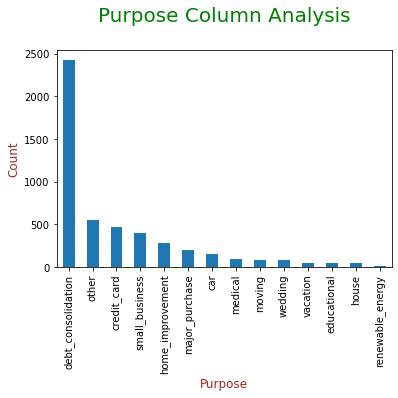

In [38]:
#Plot a bar chart of purpose column
plt.title("Purpose Column Analysis\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Purpose", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
default_dataset_loan['purpose'].value_counts().plot.bar()
plt.show()

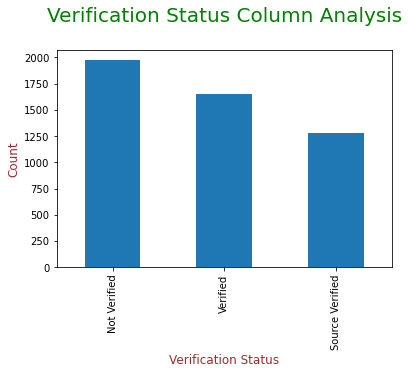

In [39]:
#Plot a bar chart of verification_status
plt.title("Verification Status Column Analysis\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Verification Status", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
default_dataset_loan['verification_status'].value_counts().plot.bar()
plt.show()

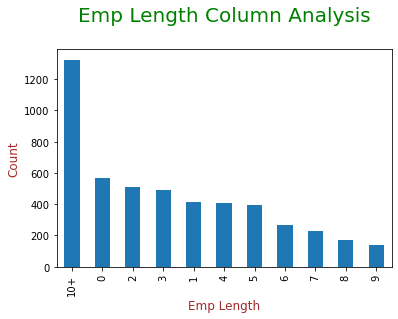

In [40]:
#Plot a bar chart of emp_length
plt.title("Emp Length Column Analysis\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Emp Length", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
default_dataset_loan['emp_length'].value_counts().plot.bar()
plt.show()

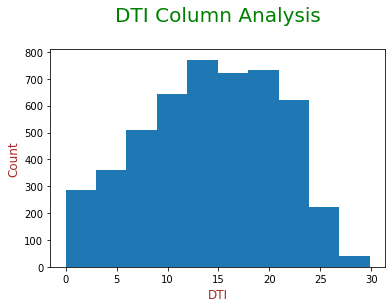

In [41]:
#Create a histogram of the dti
plt.title("DTI Column Analysis\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("DTI", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.hist(default_dataset_loan.dti)
plt.show()

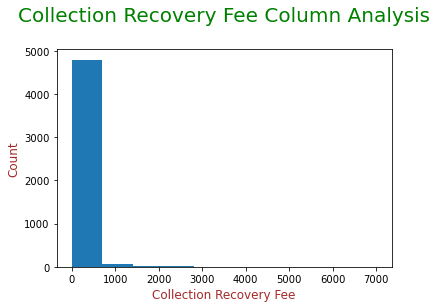

In [42]:
#Create a histogram of the collection_recovery_fee
plt.title("Collection Recovery Fee Column Analysis\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Collection Recovery Fee", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.hist(default_dataset_loan.collection_recovery_fee)
plt.show()

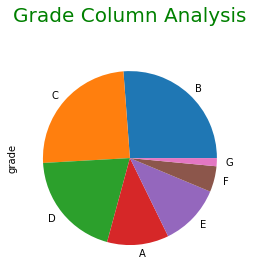

In [43]:
#Plot a pie chart
plt.title("Grade Column Analysis\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
default_dataset_loan['grade'].value_counts().plot.pie()
plt.show()

### Bivariate Analysis

<AxesSubplot:title={'center':'Bivariate Analysis for Grade and Int Rate\n'}, xlabel='grade', ylabel='Int Rate'>

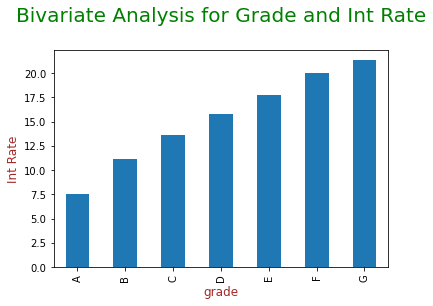

In [44]:
##Plot a bar plot of grade vs int_rate 
plt.title("Bivariate Analysis for Grade and Int Rate\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Grade", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Int Rate", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
default_dataset_loan.groupby(['grade'])['int_rate'].mean().plot.bar()

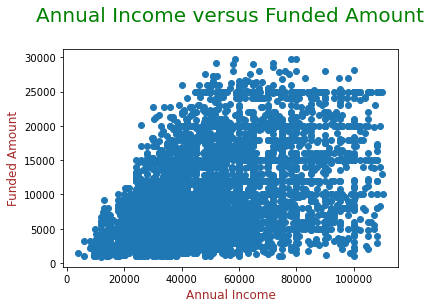

In [45]:
###Annual Income versus Funded Amount

##Plot a scatter-plot in the matplotlib way between annual_inc and funded_amnt
plt.title("Annual Income versus Funded Amount\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.scatter(default_dataset_loan['annual_inc'], default_dataset_loan['funded_amnt'])
plt.xlabel("Annual Income", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Funded Amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

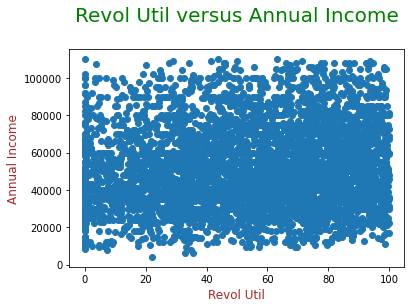

In [46]:
###Revol Util versus Annual Income

##Plot a scatter-plot in the matplotlib way between revol_util and funded_amnt
plt.title("Revol Util versus Annual Income\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.scatter(default_dataset_loan['revol_util'], default_dataset_loan['annual_inc'])
plt.xlabel("Revol Util", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Annual Income", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

### Pivot Table

In [47]:
##grade vs int_rate vs funded_amnt

pd.pivot_table(default_dataset_loan, values=['int_rate','funded_amnt'], index='grade', aggfunc=np.median)

,funded_amnt,int_rate
grade,,
A,6775,7.51
B,8875,11.12
C,9000,13.49
D,10000,15.95
E,12425,17.56
F,15800,20.25
G,15000,20.90


In [48]:
##emp_length vs annual_inc vs funded_amnt

pd.pivot_table(default_dataset_loan, values=['annual_inc','funded_amnt'], index='emp_length', aggfunc=np.average)

,annual_inc,funded_amnt
emp_length,,
0,45637.666344,9066.036907
1,48315.029002,9682.481752
10+,56063.112445,11829.735849
2,46823.825039,9550.639764
3,51026.266572,10003.296146
4,52793.951552,9995.874384
5,53689.444082,10797.831633
6,54894.516541,11000.281955
7,53358.249134,10912.987013


In [49]:
##purpose vs term vs funded_amnt

pd.pivot_table(default_dataset_loan, values=['term','funded_amnt'], index='purpose', aggfunc=np.median)

,funded_amnt,term
purpose,,
car,6000,36
credit_card,10000,36
debt_consolidation,11000,36
educational,6000,36
home_improvement,9250,36
house,9000,36
major_purchase,7000,36
medical,6000,36
moving,4350,36


### Driver Variables for default

In [50]:
##purpose vs int_rate vs revol_util
ratio = pd.pivot_table(default_dataset_loan, values=['int_rate','revol_util'], index='purpose', aggfunc=np.median)

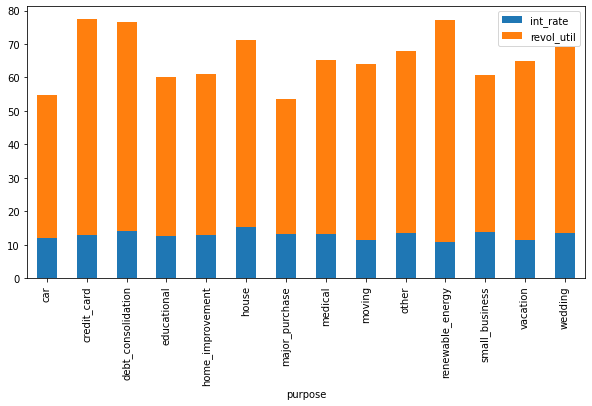

In [51]:
ratio.plot(kind="bar", stacked="True", figsize=[10,5])
plt.show()

In [52]:
#Create new column for monthly income
default_dataset_loan['monthly_income'] = default_dataset_loan['annual_inc'] / 12

In [53]:
monthly = pd.pivot_table(default_dataset_loan, values=['installment','monthly_income'], index='emp_length', columns="home_ownership", aggfunc=np.median)

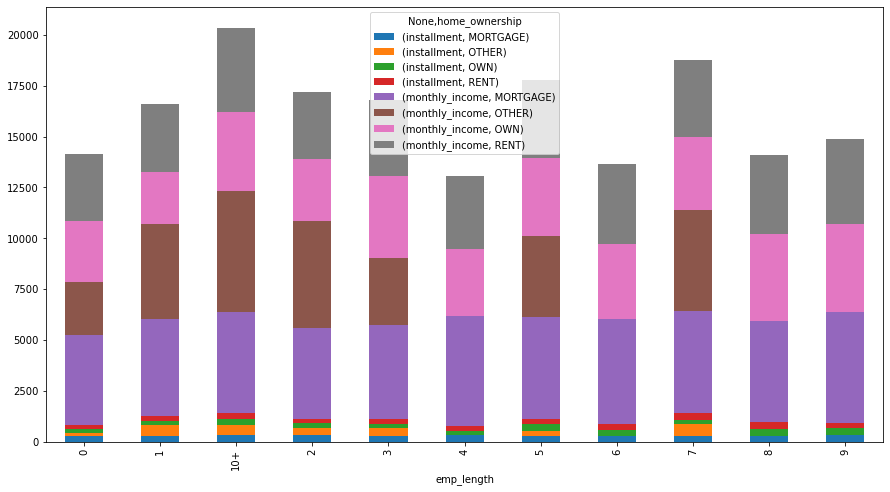

In [54]:
monthly.plot(kind="bar", stacked="True", figsize=[15,8])
plt.show()

In [55]:
##annual_inc vs funded_amnt vs emp_length vs verification_status

amount = pd.pivot_table(default_dataset_loan, values=['annual_inc','funded_amnt'], index='emp_length', columns="verification_status", aggfunc=np.median)

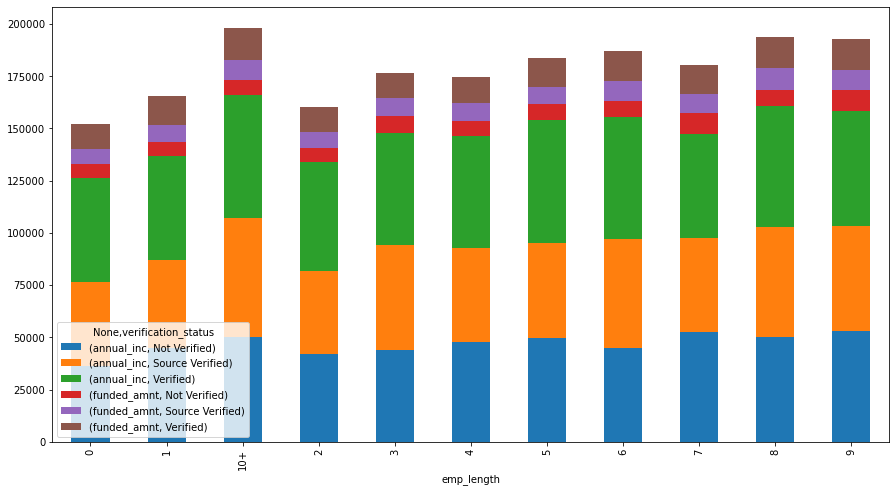

In [56]:
amount.plot(kind="bar", stacked="True", figsize=[15,8])
plt.show()

In [57]:
###create new column for payment_due based on the funded_amnt and total_pymnt

default_dataset_loan['payment_due'] = default_dataset_loan['funded_amnt'] - default_dataset_loan['total_pymnt']

In [58]:
payment = pd.pivot_table(default_dataset_loan, values=['funded_amnt','payment_due','total_pymnt'], index='grade', aggfunc=np.average)

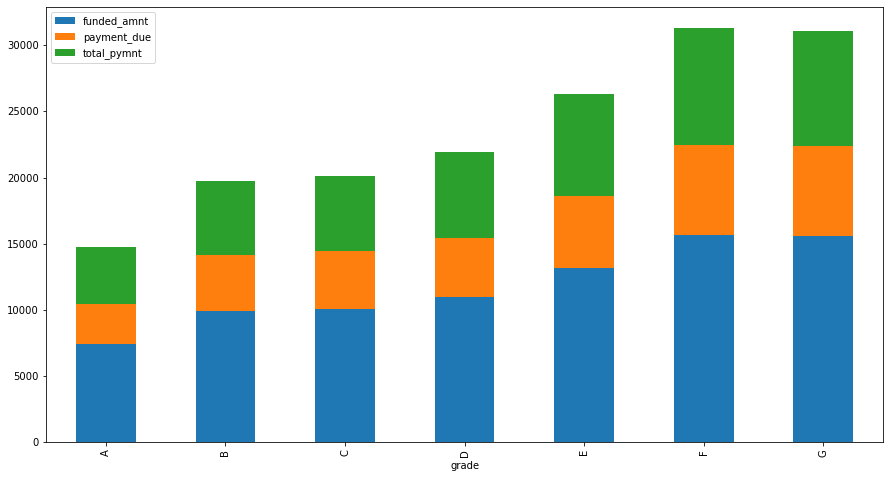

In [59]:
payment.plot(kind="bar", stacked="True", figsize=[15,8])
plt.show()

## For Non Default

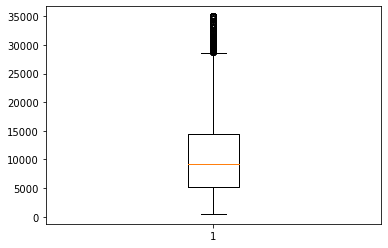

In [60]:
#Create a box plot for non-default data funded_amnt column
plt.boxplot(non_default_dataset_loan.funded_amnt)
plt.show()

In [61]:
non_default_dataset_loan.funded_amnt.describe()

count    32865.000000
mean     10632.604595
std       6957.146690
min        500.000000
25%       5125.000000
50%       9250.000000
75%      14525.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [62]:
#Check the funded_amnt with more than 27000
non_default_dataset_loan[non_default_dataset_loan.funded_amnt > 27000]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,tax_liens
30,31825,31825,31825.00000,36,7.90,995.82,A,A4,5,MORTGAGE,...,31825.00,3061.91,0.0,0.0,0.0,Aug-13,16966.70,Feb-16,0.0,0.0
127,35000,35000,35000.00000,36,8.90,1111.37,A,A5,6,MORTGAGE,...,35000.00,5009.01,0.0,0.0,0.0,Jan-15,1123.85,Mar-16,0.0,0.0
184,35000,35000,35000.00000,36,10.65,1140.07,B,B2,2,MORTGAGE,...,35000.00,3061.50,0.0,0.0,0.0,Oct-13,272.59,Sep-13,0.0,0.0
192,28000,28000,27975.00000,60,17.58,704.64,D,D4,5,MORTGAGE,...,28000.00,411.15,0.0,0.0,0.0,Jan-12,28412.43,Jan-12,0.0,0.0
208,29500,29500,28513.45925,60,20.30,786.51,E,E5,6,MORTGAGE,...,29500.00,16255.23,0.0,0.0,0.0,Oct-15,9781.44,May-16,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19754,32000,32000,31684.89912,60,20.85,863.01,G,G3,5,RENT,...,32000.01,12455.79,0.0,0.0,0.0,Apr-13,22899.00,Apr-13,0.0,0.0
19765,32000,32000,31569.14450,60,19.74,843.19,F,F5,8,RENT,...,31961.81,18551.71,0.0,0.0,0.0,Feb-16,842.34,May-16,1.0,0.0
19779,30000,30000,29094.62328,60,16.40,735.94,E,E1,6,MORTGAGE,...,30000.00,6942.91,0.0,0.0,0.0,Feb-13,11730.77,Apr-16,0.0,0.0
19792,30000,30000,30000.00000,60,17.88,759.85,E,E5,10+,MORTGAGE,...,29999.99,15590.60,0.0,0.0,0.0,Feb-16,759.45,Apr-16,0.0,0.0


In [63]:
#Clean the funded_amnt column for non-default
non_default_dataset_loan = non_default_dataset_loan[non_default_dataset_loan.funded_amnt < 27000]